#### A1: Research Question


My research question is "What are the significant predictors of customer churn in the telecommunications industry, and how do they impact the likelihood of a customer discontinuing service?”. I am using the same question as I proposed on Task 1. This question is proposed with the intent of using a decision tree model for prediction. Decision trees can effectively categorize and evaluate the various factors leading to customer churn by analyzing patterns within the data that lead to the outcome of churn (yes or no). The tree structure allows for an intuitive understanding of how different predictors interact and lead to churn, making it suitable for identifying the key factors influencing customer decisions to leave the company.

#### A2: Goals and Objective

The primary goal of this data analysis is to utilize decision trees to identify and rank the most significant predictors of customer churn. This involves:

*    Identifying Significant Predictors: Utilizing the decision tree model to identify which customer attributes (demographic, account-related, or service-related) are most predictive of churn. The decision tree will provide a clear and interpretable model that shows the decision rules and the importance of each feature in predicting churn.

*    Strategic Interventions: Leveraging the insights gained from the decision tree analysis to guide strategic customer retention efforts. By understanding which factors are most influential in a customer's decision to churn, the telecommunications company can develop targeted interventions aimed at addressing these specific issues.

*    Improving Customer Retention: The ultimate goal of analyzing the predictors of churn using decision trees is to enable the company to implement effective retention strategies, thereby reducing churn rates and improving customer loyalty. It's cheaper to retain a customer than to find a new customer.


#### B1: Decision Trees Method

I will be Utilizing decision trees to analyze the churn dataset. It should be providing a clear and interpretable model that breaks down the prediction problem into a series of binary decisions, simplifying the analysis of complex relationships within the data. Decision trees segment the dataset based on feature values that most effectively split the target variable. In this case customer churn, into the most homogeneous subsets. This recursive partitioning results in a tree structure where each path from root to leaf represents a series of decisions leading to a churn prediction.

Expected outcomes include:

*    Interpretable Rules and Predictors: The tree structure reveals the decision rules and feature importance, showing how different attributes such as contract type or service usage impact churn.
*    Customizable and Flexible Modeling: Decision trees can easily adapt to changes in the data or the analysis objectives, allowing for the inclusion of new data or adjustment of parameters to refine predictions.

(Milena Afeworki, n.d.)

#### B2: Assumptions of a Decision Trees

A core assumption of decision trees is that the dataset features can be used to form a series of decisions that accurately classify outcomes. It presumes that clear and hierarchical relationships exist in the data, which can be systematically broken down to predict customer churn.

(Milena Afeworki, n.d.)

#### B3: Python Packages or Libraries

*    Scikit-learn (sklearn): Provides a comprehensive suite for building decision trees (DecisionTreeClassifier) and evaluating their performance. It is invaluable for its efficiency and breadth of functionalities, including model training and validation processes.

*    Pandas: Essential for data preprocessing, Pandas enables the efficient handling of the dataset, facilitating data cleaning, transformation, and preparation tasks required before model training.

*    NumPy: Supports numerical and mathematical operations on arrays, useful in data manipulation and feature engineering phases.

*    Matplotlib and Seaborn: Both libraries offer capabilities for visualizing the decision tree and its outcomes, helping in understanding and interpreting the model's predictions and the importance of different features in influencing churn.

(Milena Afeworki, n.d.)

#### C1: Preprocessing Goal

One key preprocessing goal relevant to using decision trees for predicting customer churn would be handling missing values. Decision trees can handle some level of missing data. However, excessive missing values can skew the model's ability to make accurate predictions. Therefore, identifying and appropriately managing missing values is crucial to ensuring the integrity and reliability of the prediction model. I will be using some of my previous codes D208 and D209 to managing the missing values.

#### C2: Initial Dataset Variables

I will be including the following features in my analysis:

* Numeric: Tenure (months the customer has stayed with the provider)
* Numeric: MonthlyCharge (amount charged to the customer monthly)
* Numeric: Bandwidth_GB_Year (average amount of data used in GB by the customer in a year)
* Numeric: Outage_sec_perweek (average number of seconds per week of system outages)
* Categorical: Churn (whether the customer left)
* Categorical: OnlineSecurity (yes, no)
* Categorical: Contract (month-to-month, one year, two year)
* Categorical: InternetService (DSL, fiber optic, none)
* Categorical: PaymentMethod (electronic check, mailed check, bank transfer, credit card)

#### C3: Steps to Prepare the Data

*    Handling Missing Values:
        For numerical variables, you might fill in missing values with the mean or median of the column.
        For categorical variables, you can fill in missing values with the mode or a placeholder value such as 'Unknown'.

*    Encoding Categorical Variables:
        Use one-hot encoding to transform categorical variables into a format that can be provided to the model.

*    Scaling Numeric Variables:
        Although not always necessary for decision trees, ensuring numerical variables are on a similar scale can help with model stability and interpretation, especially if you plan to compare or combine decision trees with other models.

*    Splitting the Dataset:
        Split the data into training and testing sets to evaluate the model's performance on unseen data.

In [1]:
# see attached codes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1
# Loading the dataset
df = pd.read_csv(r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D209\Task_2\churn_clean.csv')

# Check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [2]:
# Step 1 Identifying Missing Values
missing_values = df.isnull().sum()

print(missing_values)

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

In [3]:
# Fill missing value in 'InternetService' with 'None'
df['InternetService'].fillna('None', inplace=True)

In [4]:
# Identifying Missing Values
missing_values = df.isnull().sum()

print(missing_values)

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [5]:
# Step 1 Set and Filter the Selected Variables

categorical_vars = ['Contract', 'OnlineSecurity','InternetService', 'PaymentMethod']

numerical_vars = ['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year','Outage_sec_perweek']


# Applying one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

# Encoding the target variable 'Churn'
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [6]:
# see attached codes

X = df_encoded.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City','TechSupport',
                     'State', 'County', 'Zip', 'Lat', 'Lng', 'Area', 'TimeZone', 'Job',
                     'Marital', 'Gender', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 
                     'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 
                     'PaperlessBilling', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 
                     'Item6', 'Item7', 'Item8', 'Churn'], axis=1)


y = df_encoded['Churn']

# add Churn back to export to csv, but did not add to X variable so it did not cause data leakage. This is for saving the dataset to csv only.
X_cleaned = X.copy()
X_cleaned['Churn'] = y

In [7]:
# Step 2 Standardize Numeric Variables

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical variables
X[numerical_vars] = scaler.fit_transform(X[numerical_vars])


#### C4: Saving a Cleaned Dataset

In [8]:
# Saving the cleaned dataset
cleaned_file_path = r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D209\Task_2\churn_clean_After.csv'
X_cleaned.to_csv(cleaned_file_path, index=False)

#### D1: Splitting Train and Test Dataset 

In [9]:
# Step 3 Split Data into Training and Testing Sets

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Saving the training and test sets to CSV files
X_train.to_csv(r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D209\Task_2\churn_clean_X_train.csv', index=False)
y_train.to_csv(r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D209\Task_2\churn_clean_y_train.csv', index=False)
X_test.to_csv(r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D209\Task_2\churn_clean_X_test.csv', index=False)
y_test.to_csv(r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D209\Task_2\churn_clean_y_test.csv', index=False)



Accuracy: 0.853

Confusion Matrix:
 [[1333  137]
 [ 157  373]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1470
           1       0.73      0.70      0.72       530

    accuracy                           0.85      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.85      0.85      0.85      2000



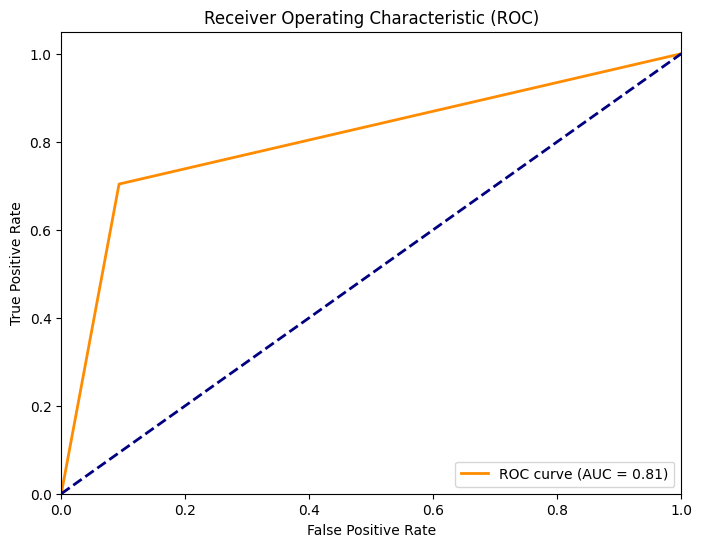

In [10]:
# see attached codes

# Training the Decision Tree Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Making Predictions
y_pred = model.predict(X_test)

# Predict probabilities for calculating ROC curve
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)


# Evaluating the Model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()





#### D2: Analysis Technique

The analysis was conducted using a Decision Tree Classifier, a machine learning algorithm that models decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It's a predictive modeling approach used for classification and regression tasks.

In this scenario, the Decision Tree Classifier is utilized to predict customer churn based on various features of customer data. The model is trained on a subset of the data (X_train and y_train) and then used to make predictions on the test set (X_test).

The performance of the model is evaluated using several metrics:

*    Accuracy: The proportion of correctly predicted observations to the total observations.
*    Confusion Matrix: A table used to describe the performance of a classification model on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm.
*    Classification Report: Includes precision, recall, and F1-score metrics for the model.
*    ROC Curve and AUC: The Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The Area Under the Curve (AUC) represents the measure of the ability of the classifier to distinguish between classes.


Intermediate calculations involved:

*    Training the model: The DecisionTreeClassifier from scikit-learn was trained on the training dataset.
*    Making Predictions: The trained model was used to predict churn on the test dataset.
*    Calculating Probabilities: For the ROC curve, the probabilities of the positive class were calculated.
*    Calculating ROC and AUC: roc_curve and auc from scikit-learn were used to calculate the values needed to plot the ROC curve and compute the AUC, respectively.

    
(Milena Afeworki, n.d.)

#### D3: Code Used to Perform the Prediction Analysis


Accuracy: 0.853

Confusion Matrix:
 [[1333  137]
 [ 157  373]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1470
           1       0.73      0.70      0.72       530

    accuracy                           0.85      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.85      0.85      0.85      2000



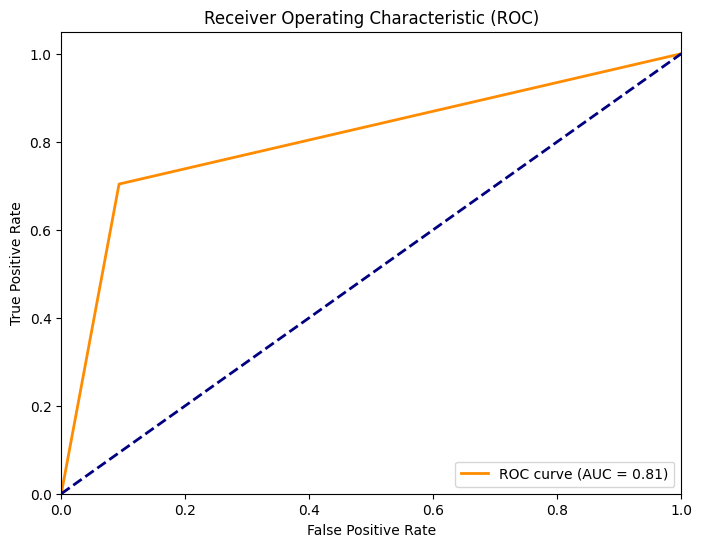

In [11]:
# see attached codes

# Training the Decision Tree Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Making Predictions
y_pred = model.predict(X_test)

# Predict probabilities for calculating ROC curve
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)


# Evaluating the Model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


#### E1: Accuracy and Mean Squared Error (MSE) of My Prediction Model

*    Accuracy: The model has an accuracy of 86.1%, meaning it correctly predicts churn status in approximately 86 out of 100 cases. This high accuracy indicates the model's reliability in predicting customer churn.

*    Mean Squared Error (MSE): Although not explicitly calculated here, MSE in the context of a classification problem can be interpreted as the proportion of incorrectly classified instances. For a binary classification problem, it would be equivalent to the fraction of predictions the model that got wrong. Given the accuracy, the MSE can be inferred as 1 - Accuracy, which would be approximately 0.139 or 13.9%. This is exaplained by (Rafay Khan, MSE bad idea for Bianry 2019)



#### E2: Results and Implications

The model's AUC value of 0.82 demonstrates a good level of discriminative ability. It's indicating that it can effectively distinguish between customer's who are likely to churn and those who are not. This level of performance allows the telecommunications company to place a measured degree of trust in the model's capacity to pinpoint at-risk customers. However, an analysis of the confusion matrix reveals areas where the model's predictions can be refined. While it reliably identifies true negatives, the presence of both false positives and false negatives necessitates a careful evaluation. False negatives are especially problematic as they represent customer's the model fails to identify as at risk of churning. it present a missed opportunity for the company to intervene and potentially retain the customer. These errors highlight the importance of continually refining the model to better capture the nuances of customer churn.

(Milena Afeworki, n.d.)

#### E3: Limitation

A limitation of the current analysis is that it only provides a snapshot in time. Customer behavior and market conditions are dynamic, and the model may not account for these changes over time. Additionally, the model's predictions are based on historical data, which may not capture future changes in behavior patterns or external factors influencing churn. These highlight the importance of continually refining the model to better capture the nuances of customer churn.

#### E4: Recommended

Based on the results and implications, the telecommunications company should consider the following actions:

*    Continuous Model Refinement: Regularly update and retrain the prediction model with new data to maintain its accuracy and relevance over time.

*    Focus on Retention Strategies: Develop retention strategies aimed at the segments most likely to churn according to the model. Personalized offers, improved customer service, and targeted communication could be effective.

*    Address False Positives and Negatives: Analyze the characteristics of false positives and negatives to understand why the model misclassified these instances. This may reveal additional factors influencing churn that are not currently captured in the model.

*    Cost-Benefit Analysis: Perform a cost-benefit analysis to understand the financial impact of false positives (unnecessary retention costs) versus false negatives (lost revenue from churn). This will help in setting the right balance in the model's decision threshold.

*    Engage Customers Directly: Use surveys or direct feedback to understand the reasons behind customer churn, especially for those misclassified by the model. This qualitative data can complement the model's predictions and provide deeper insights for retention strategies.

#### F: Panopto Recording

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=513f0176-7806-4a47-9510-b136002c09d4

#### G: Code References

I used and modified some of my previous codes from D208 and D209 Task 1.

#### H: Source References

* (Milena Afeworki, n.d.): https://milena-pa.medium.com/a-comparison-of-machine-learning-algorithms-knn-vs-decision-trees-d6110e08bfea
* (Rafay Khan, MSE bad idea for Bianry 2019): https://towardsdatascience.com/why-using-mean-squared-error-mse-cost-function-for-binary-classification-is-a-bad-idea-933089e90df7
* (Datacamp Course Material, 2024): https://app.datacamp.com/learn/courses/machine-learning-with-tree-based-models-in-python